In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [96]:
df = pd.read_csv("Raisin_Dataset.csv")

In [3]:
print("Head: ", df.head())

Head:      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [4]:
print("Shape: ", df.shape)

Shape:  (900, 8)


In [5]:
print("Distribution of target variables: ", df.Class.value_counts())

Distribution of target variables:  Class
Kecimen    450
Besni      450
Name: count, dtype: int64


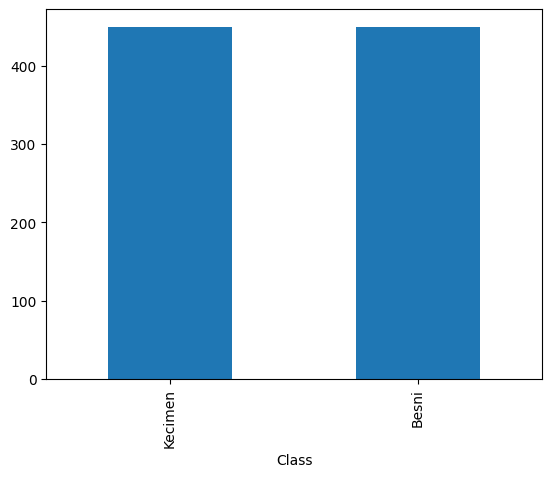

In [6]:
df.Class.value_counts().plot(kind="bar")
plt.show()

<Axes: ylabel='Frequency'>

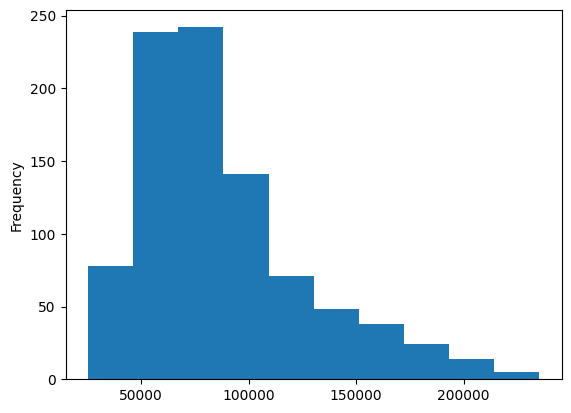

In [82]:
df.Area.plot(kind="hist")

<Axes: ylabel='Frequency'>

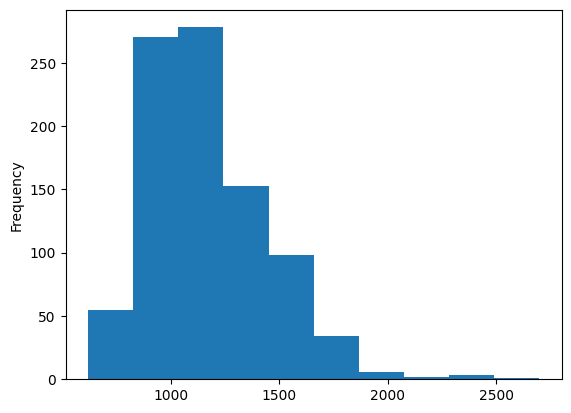

In [8]:
df.Perimeter.plot(kind="hist")

C:\Users\james\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (900). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: ylabel='Frequency'>

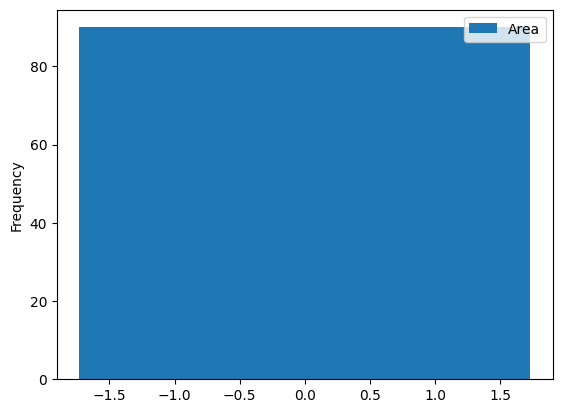

In [9]:
Area = QuantileTransformer().fit_transform(df[["Area"]])

Area = StandardScaler().fit_transform(Area)
Area = pd.DataFrame(Area, columns=["Area"])
Area.plot(kind="hist")

AttributeError: Rectangle.set() got an unexpected keyword argument 'c'

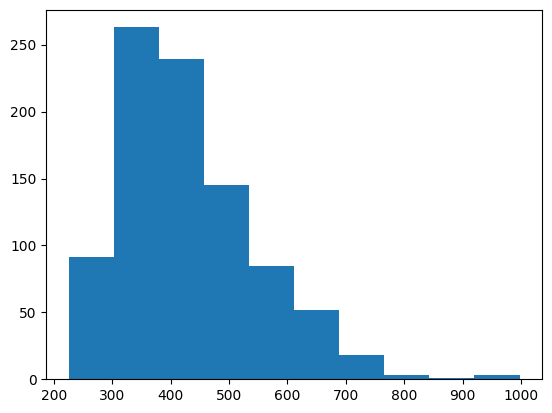

In [80]:
df.MajorAxisLength.plot(kind="hist")

<Axes: ylabel='Frequency'>

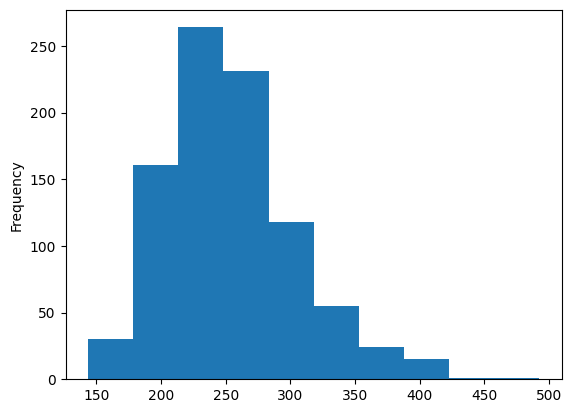

In [12]:
df.MinorAxisLength.plot(kind="hist")

In [72]:
df.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

ValueError: could not convert string to float: 'Kecimen'

<Axes: ylabel='Frequency'>

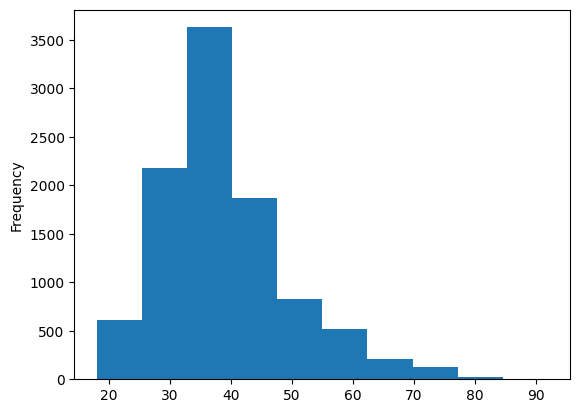

In [4]:
df.Age.plot(kind="hist")

In [79]:
Age_new = QuantileTransformer().fit_transform(df[["Age"]])

Age_new_scaled = StandardScaler().fit_transform(Age_new)
Age_new_df = pd.DataFrame(Age_new_scaled, columns=["Age"])

Age_new_df.plot(kind="hist", c=y)

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

In [10]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

ValueError: 'c' argument has 900 elements, which is inconsistent with 'x' and 'y' with size 1.

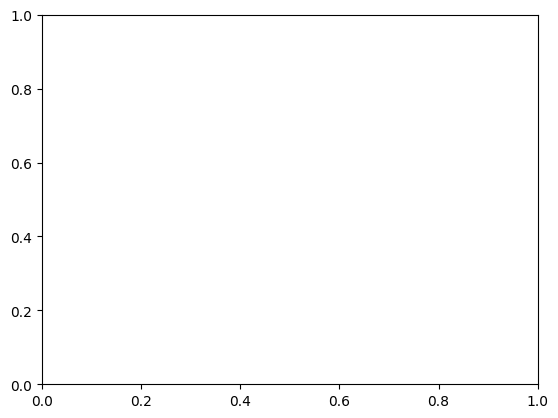

In [78]:
X = df["Area"].values
y = df["Class"] == "Besni"



plt.scatter(X[0], X[1], c=y)




In [41]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

df.head

<bound method NDFrame.head of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      0  
1    0.684130

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


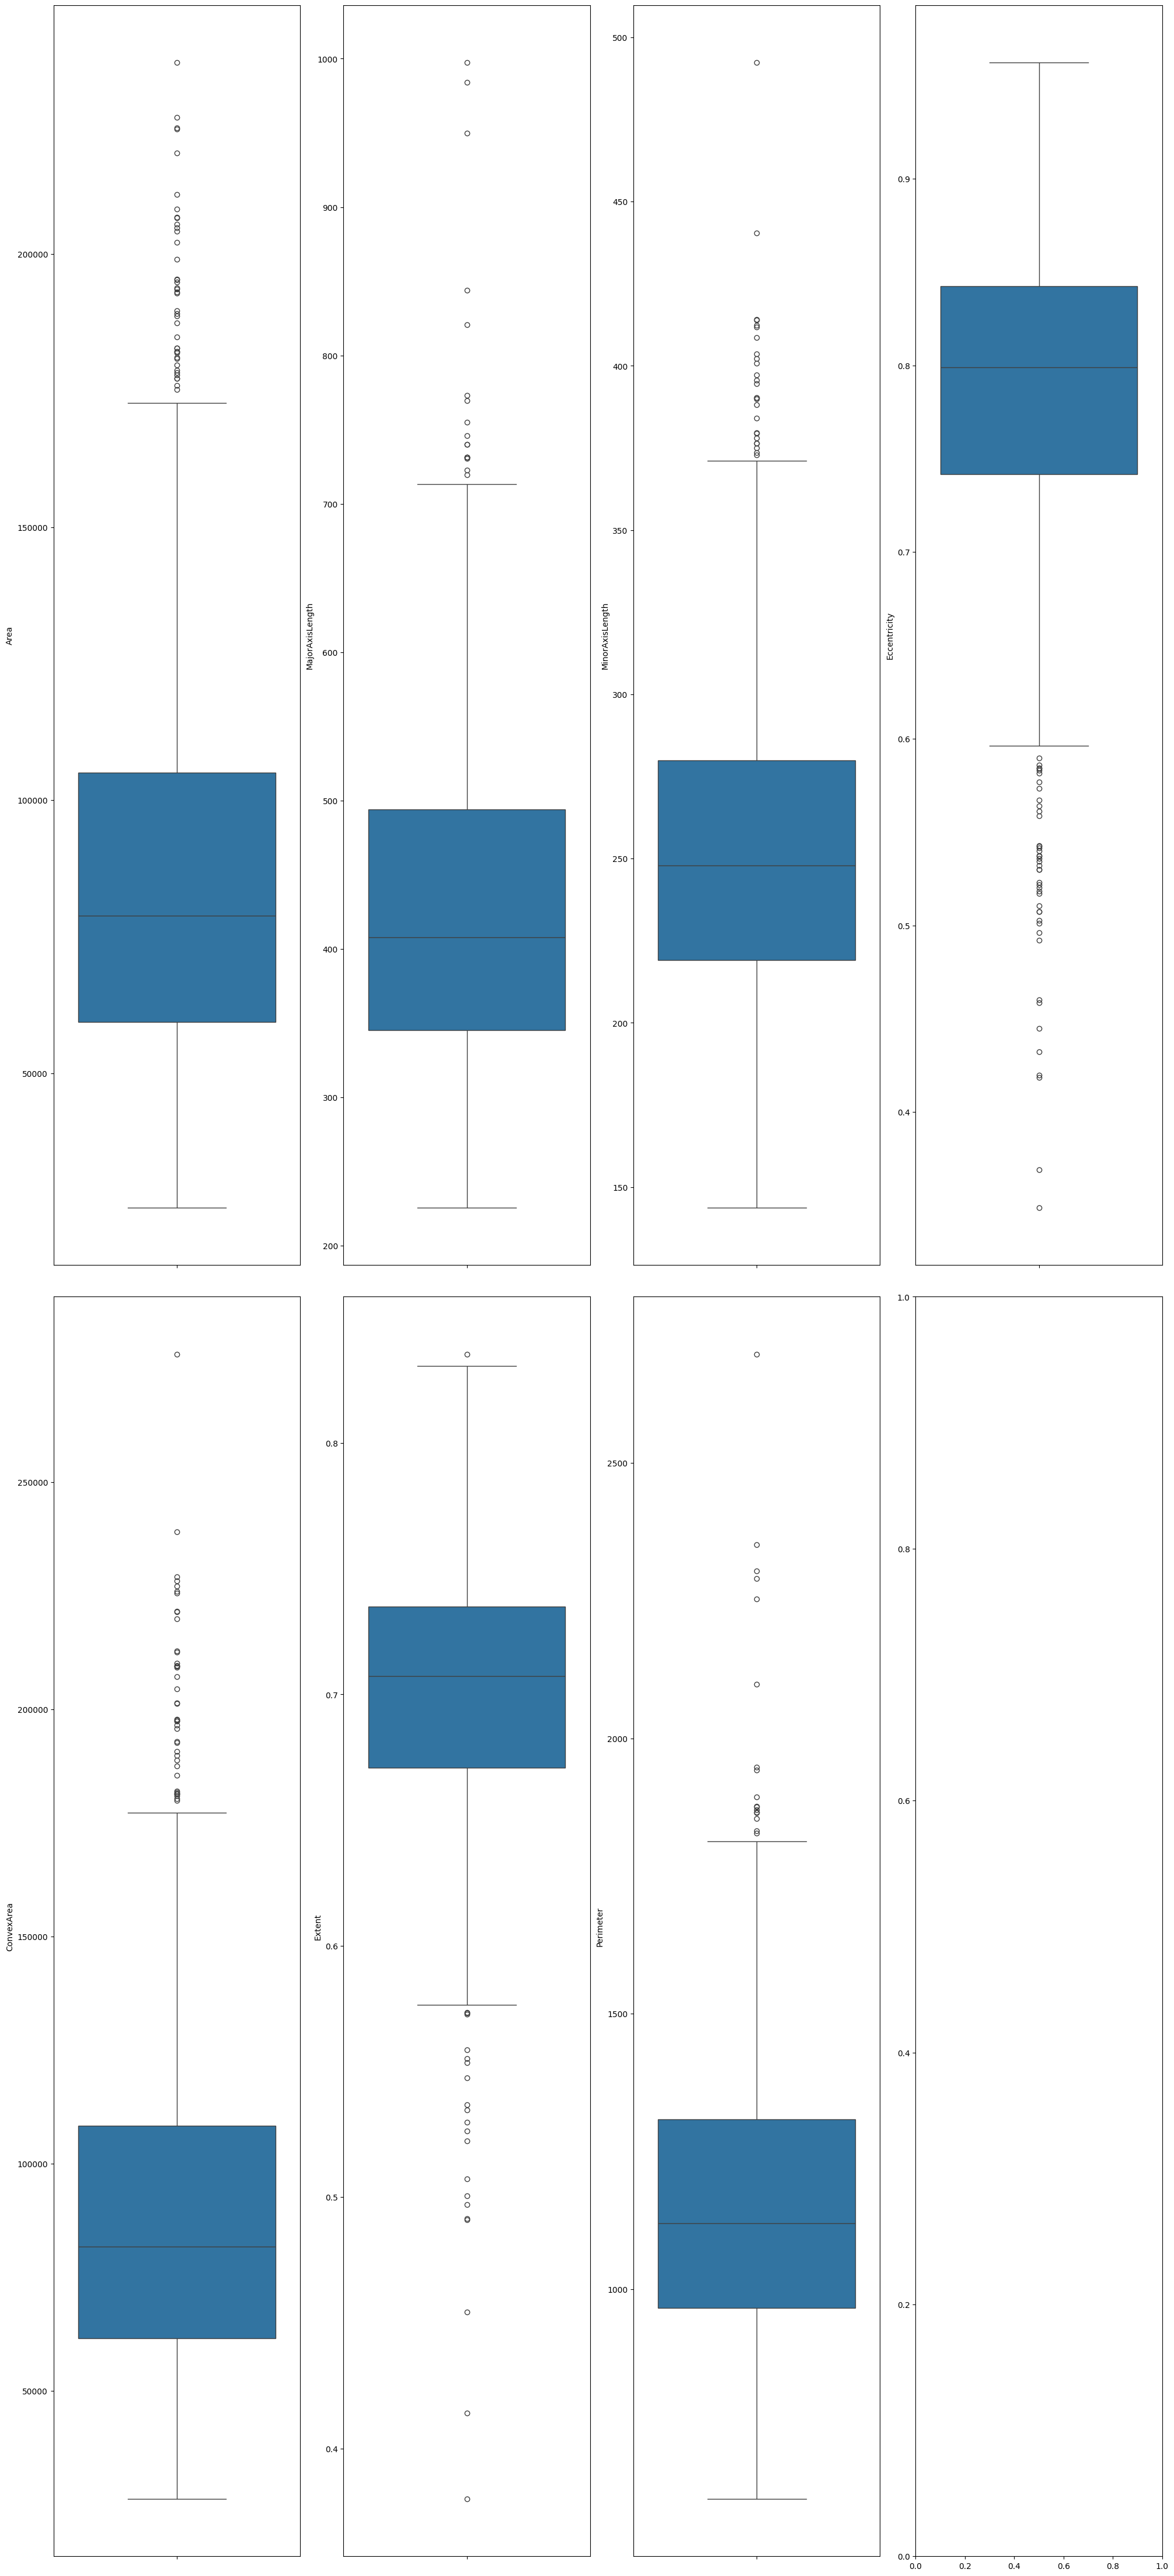

In [71]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,44), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.boxplot(y=df[column], ax=axes[i, j])

    if j == 3:
        j = 0
        i += 1
    else:
        j += 1
    

In [44]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.0
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.0
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.0
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.0
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.0
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.0
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,0.0
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

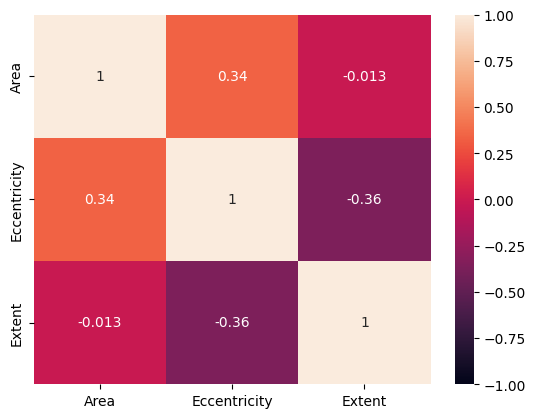

In [51]:
df.head
df = df.drop(["Class"], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.show

C:\Users\james\AppData\Local\Temp\ipykernel_34912\1804037161.py:7: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=df[column], y=df["Class"],fill=True, ax=axes[i, j])


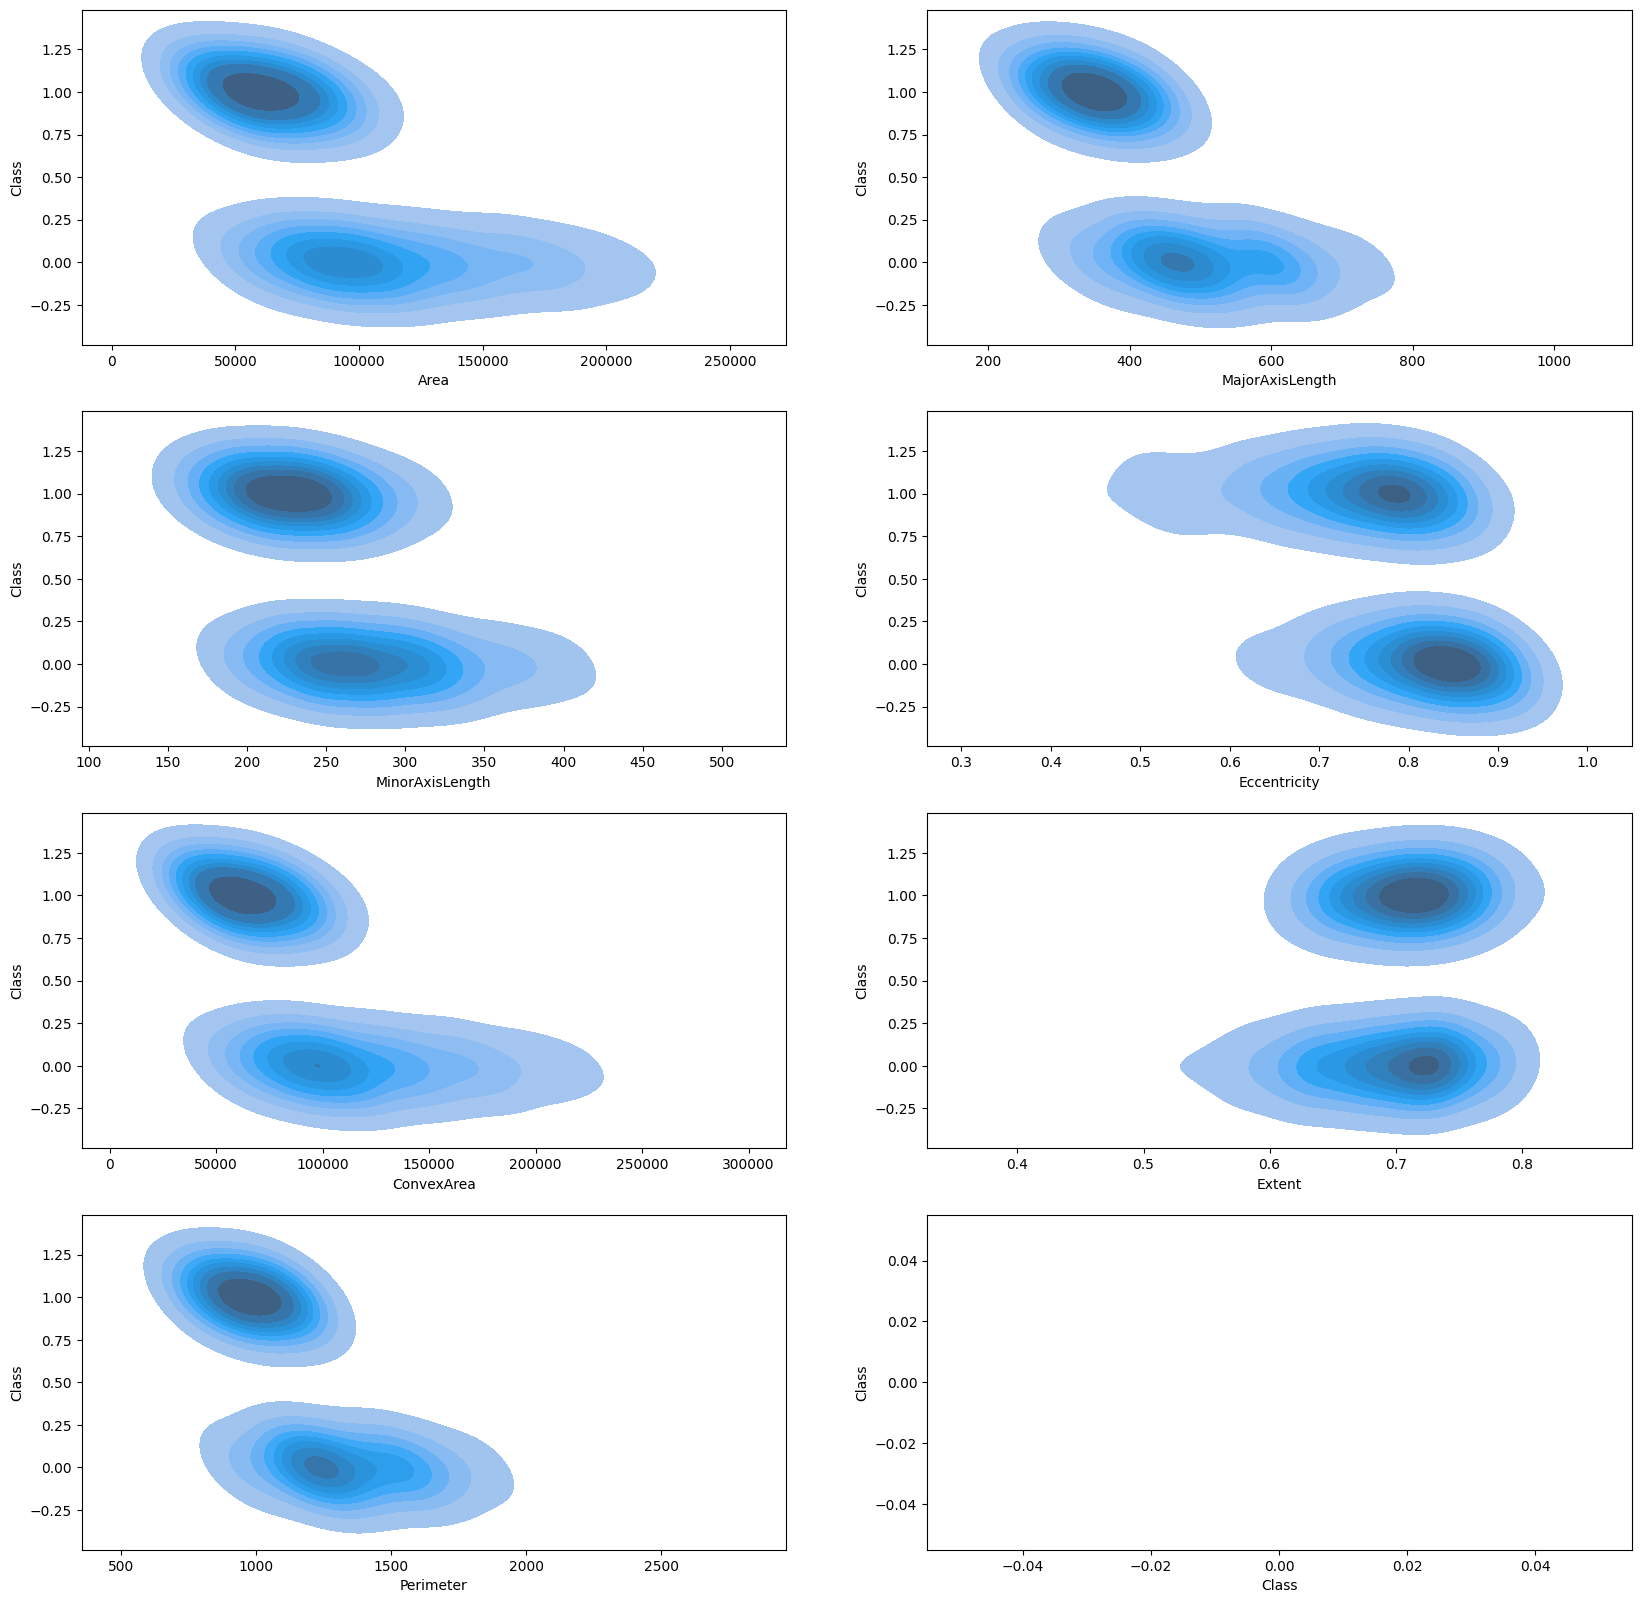

In [125]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), constrained_layout = False)

i = j = 0

for column in numerical_cols:
    sns.kdeplot(data=df, x=df[column], y=df["Class"],fill=True, ax=axes[i, j])

    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

<Axes: xlabel='Area', ylabel='Class'>

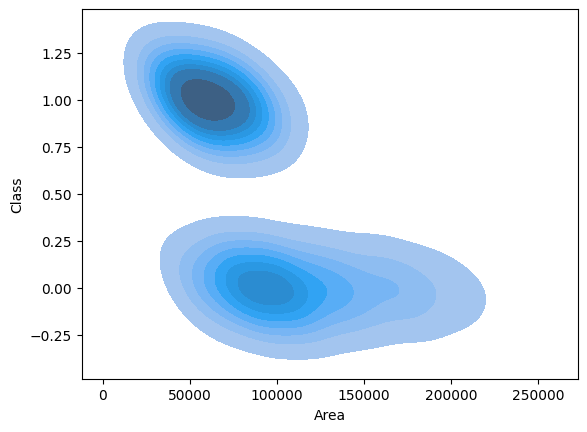

In [86]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

sns.kdeplot(data=df, x=df["Area"], y=df["Class"],fill=True)

<Axes: xlabel='Perimeter', ylabel='Class'>

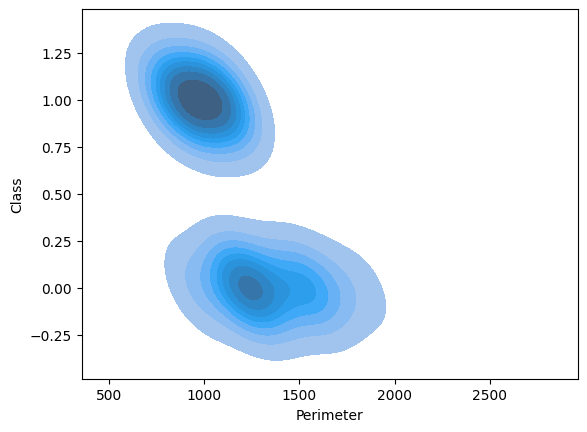

In [87]:
sns.kdeplot(data=df, x=df["Perimeter"], y=df["Class"],fill=True)

<Axes: xlabel='Eccentricity', ylabel='Class'>

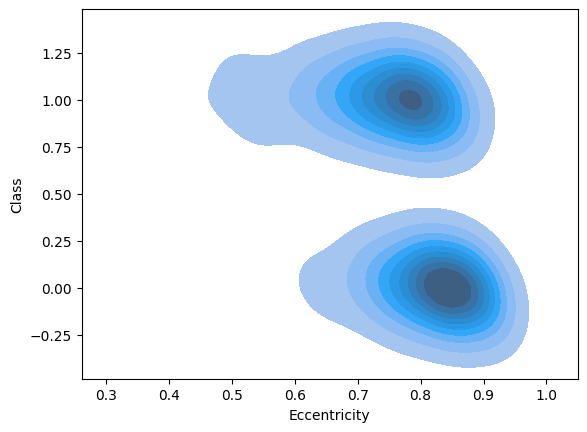

In [88]:
sns.kdeplot(data=df, x=df["Eccentricity"], y=df["Class"],fill=True)

<Axes: xlabel='Extent', ylabel='Class'>

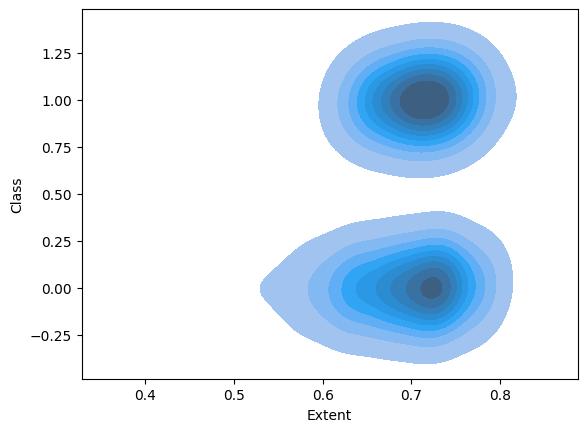

In [89]:
sns.kdeplot(data=df, x=df["Extent"], y=df["Class"],fill=True)

<Axes: xlabel='ConvexArea', ylabel='Class'>

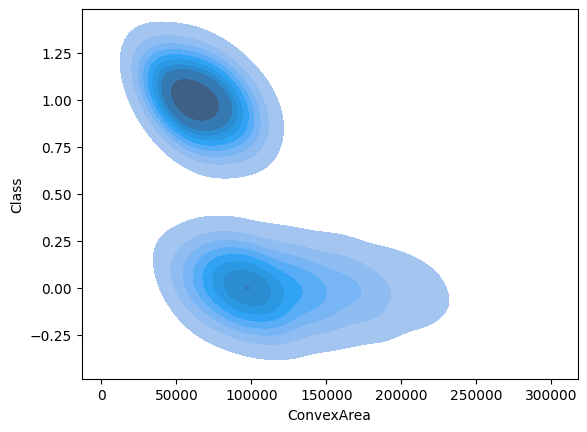

In [90]:
sns.kdeplot(data=df, x=df["ConvexArea"], y=df["Class"],fill=True)

IndexError: index 2 is out of bounds for axis 1 with size 2

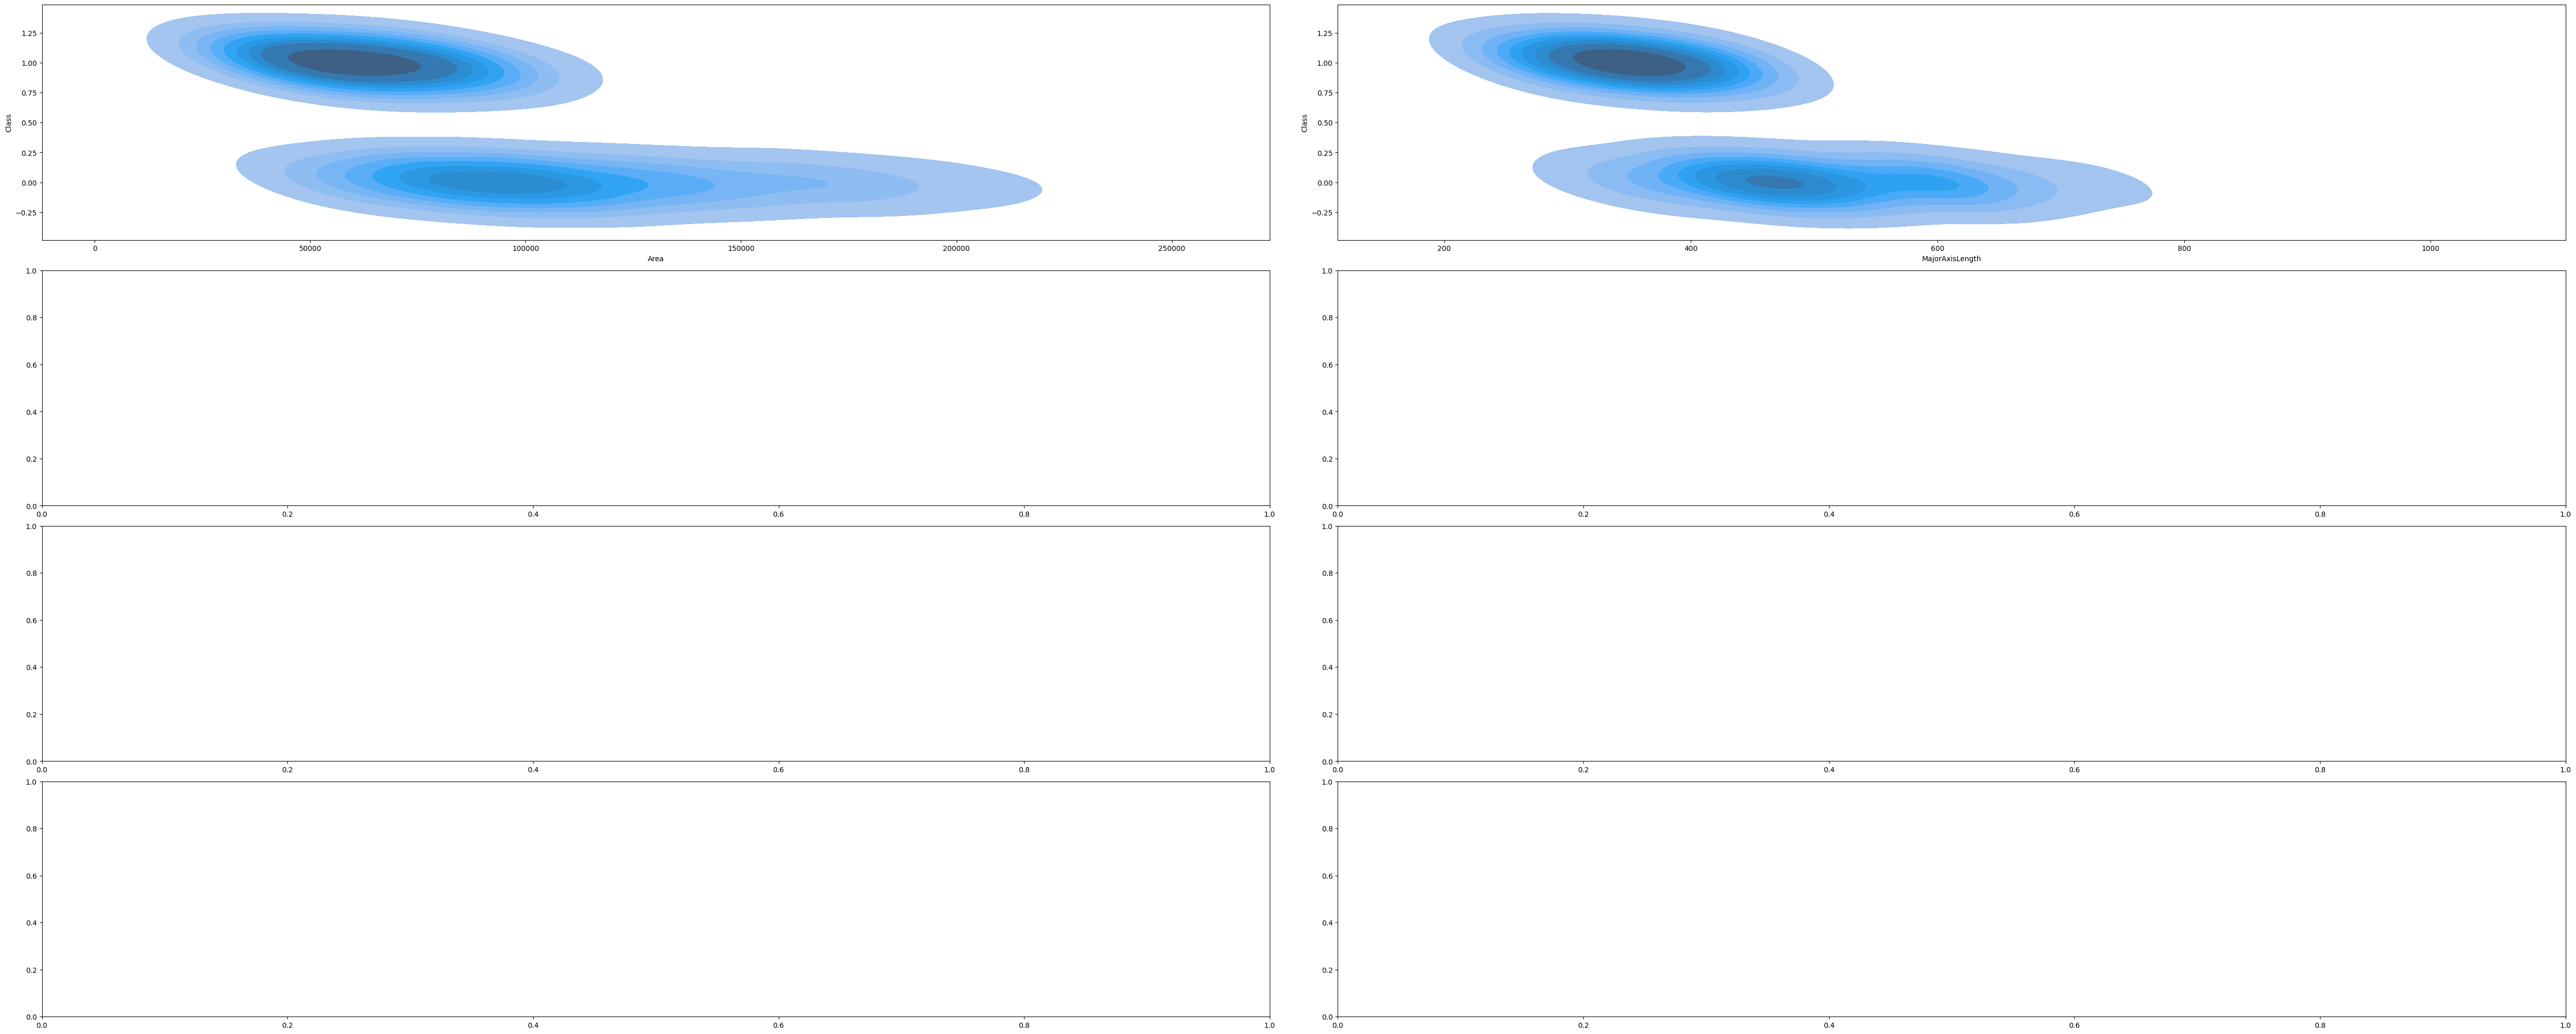

In [108]:


numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(50, 20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.kdeplot(data=df, x=df[column], y=df["Class"],fill=True, ax=axes[i, j])

    if j == 3:
        j = 0
        i += 1
    else:
        j += 1